<a href="https://colab.research.google.com/github/Willian-Jose/ColabsPython/blob/main/previsaoRadioterapias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.10


In [3]:
# Montando drive do Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Importando os módulos
import pandas as pd      
import seaborn as sns
from pandasql import sqldf
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np                
%matplotlib inline             

In [9]:
# Manipulação de datas
from datetime import date
from dateutil.relativedelta import relativedelta

In [10]:
# Machine learning
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
pd.__version__

'1.3.5'

In [12]:
mat.__version__

'3.5.3'

In [13]:
# Carregando o dataset
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/RADIOTERAPIA.xls")   

In [17]:
# Verificando o formato dos dados
df.shape

(11012, 8)

In [18]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

In [ ]:
# Limpeza dos dados caso necessário
#df=df.dropna()
#df=df.dropna(axis=0)
#df=df.dropna().reset_index(drop=True)

In [19]:
display(df)

,IDRAD,DT_DIA,HR_CONSULTA,NM_PACIENTE,STATUS,MÊS,ANO,RADIOS
0,1,2019-01-03,05:36 PM,Paciente Genérico,Concluído,1,2019,1
1,2,2019-01-07,01:48 PM,Paciente Genérico,Concluído,1,2019,1
2,3,2019-01-07,05:36 PM,Paciente Genérico,Concluído,1,2019,1
3,4,2019-01-07,06:12 PM,Paciente Genérico,Concluído,1,2019,1
4,5,2019-01-08,03:00 PM,Paciente Genérico,Concluído,1,2019,1
...,...,...,...,...,...,...,...,...
11007,11008,2022-11-29,02:48 PM,Paciente Genérico,Concluído,11,2022,1
11008,11009,2022-11-29,05:48 PM,Paciente Genérico,Concluído,11,2022,1
11009,11010,2022-11-30,12:24 PM,Paciente Genérico,Concluído,11,2022,1
11010,11011,2022-11-30,02:36 PM,Paciente Genérico,Concluído manualmente,11,2022,1


In [20]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11012 entries, 0 to 11011
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   IDRAD        11012 non-null  int64         
 1   DT_DIA       11012 non-null  datetime64[ns]
 2   HR_CONSULTA  11012 non-null  object        
 3   NM_PACIENTE  11012 non-null  object        
 4   STATUS       11012 non-null  object        
 5   MÊS          11012 non-null  int64         
 6   ANO          11012 non-null  int64         
 7   RADIOS       11012 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 688.4+ KB


None

In [21]:
#q = "SELECT * FROM df LIMIT 3"
q = 'SELECT DT_DIA, SUM(RADIOS) as RADIO FROM df WHERE ANO > 2018 GROUP BY DT_DIA'
df2 = sqldf(q, globals())
df2['DT_DIA'] = pd.to_datetime(df2['DT_DIA'])
display(df2)
display(df2.info())

,DT_DIA,RADIO
0,2019-01-02,4
1,2019-01-03,10
2,2019-01-04,7
3,2019-01-07,11
4,2019-01-08,12
...,...,...
966,2022-11-24,6
967,2022-11-25,5
968,2022-11-28,12
969,2022-11-29,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DT_DIA  971 non-null    datetime64[ns]
 1   RADIO   971 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.3 KB


None

In [22]:
# Criando um novo DataFrame trazendo as conulas específicas usando o método .assign()
#df2 = pd.DataFrame().assign(DT_DIA=df['DT_DIA'], RADIOS=df['RADIOS'])
#print(df2)

r = pd.date_range(start=df2['DT_DIA'].min(), end=df2['DT_DIA'].max())
print(r)
df2 = df2.set_index('DT_DIA').reindex(r).fillna(0.0).rename_axis('DT_DIA').reset_index()


DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', length=1429, freq='D')


In [23]:
display(df2)

,DT_DIA,RADIO
0,2019-01-02,4.0
1,2019-01-03,10.0
2,2019-01-04,7.0
3,2019-01-05,0.0
4,2019-01-06,0.0
...,...,...
1424,2022-11-26,0.0
1425,2022-11-27,0.0
1426,2022-11-28,12.0
1427,2022-11-29,11.0


In [24]:
# Criando os dias da semana, com ordem e final de semana
df2['Mes'] = df2['DT_DIA'].dt.month
df2['Dia'] = df2['DT_DIA'].dt.day
df2['dia_util'] = np.busday_count(
                    df2['DT_DIA'].values.astype('datetime64[M]'),
                    df2['DT_DIA'].values.astype('datetime64[D]'))
df2['dia_semana'] = df2['DT_DIA'].dt.weekday
df2['semana_do_mes'] = (df2['DT_DIA'].dt.day 
                         - df2['DT_DIA'].dt.weekday - 2) // 7 + 2
df2['dia_semana_ordem'] = (df2['DT_DIA'].dt.day + 6) // 7
df2 = df2.set_index('DT_DIA')
df2['RADIO'] = df2['RADIO'].astype(int)

display(df2)

,RADIO,Mes,Dia,dia_util,dia_semana,semana_do_mes,dia_semana_ordem
DT_DIA,,,,,,,
2019-01-02,4,1,2,1,2,1,1
2019-01-03,10,1,3,2,3,1,1
2019-01-04,7,1,4,3,4,1,1
2019-01-05,0,1,5,4,5,1,1
2019-01-06,0,1,6,4,6,1,1
...,...,...,...,...,...,...,...
2022-11-26,0,11,26,19,5,4,4
2022-11-27,0,11,27,19,6,4,4
2022-11-28,12,11,28,19,0,5,4


In [25]:
# Dividindo os dados entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(df2.drop(['RADIO'], axis=1), df2['RADIO'],
                 test_size=0.3, random_state=1, shuffle=False)

In [26]:
# Transformando y values para o fit no xgboox
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
# Parâmetros de aprendizado
DM_train = xgb.DMatrix(data=x_train, label=y_train)
grid_param = {"learning_rate": [0.01, 0.1],
              "n_estimators": [100, 150, 200],
              "alpha": [0.1, 0.5, 1],
              "max_depth": [2, 3, 4]}
model = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=model, param_grid=grid_param,
                       scoring="neg_mean_squared_error",
                       cv=4, verbose=1)
grid_mse.fit(x_train, y_train)
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

In [28]:
# Algorítmo XGBoost
xgb_model = xgb.XGBClassifier(objective ='reg:squarederror', 
                            colsample_bytree = 1, 
                            learning_rate = 0.1,
                            max_depth = 2, 
                            alpha = 0.1, 
                            n_estimators = 100)
xgb_model.fit(x_train, y_train)
xgb_prediction = xgb_model.predict(x_test)

In [29]:
# Algorítmo KNN
knn = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto',     
                           weights = 'distance') 
knn.fit(x_train, y_train)  
knn_prediction = knn.predict(x_test)

In [30]:
# Algorítmo Random Forest
random_forest = RandomForestClassifier(n_estimators=50,
                                       max_depth=10, random_state=1)
random_forest.fit(x_train, y_train)
rf_prediction = random_forest.predict(x_test)

In [31]:
# Métricas dos modelos
xgb_matrix = metrics.confusion_matrix(xgb_prediction, y_test)
print(f"""
Confusion matrix for XGBoost model:
TN:{xgb_matrix[0][0]}    FN:{xgb_matrix[0][1]}
FP:{xgb_matrix[1][0]}    TP:{xgb_matrix[1][1]}""")
knn_matrix = metrics.confusion_matrix(knn_prediction, y_test)
print(f"""
Confusion matrix for KNN model:
TN:{knn_matrix[0][0]}    FN:{knn_matrix[0][1]}
FP:{knn_matrix[1][0]}    TP:{knn_matrix[1][1]}""")
rf_matrix = metrics.confusion_matrix(rf_prediction, y_test)
print(f"""
Confusion matrix for Random Forest model:
TN:{rf_matrix[0][0]}    FN:{rf_matrix[0][1]}
FP:{rf_matrix[1][0]}    TP:{rf_matrix[1][1]}""")


Confusion matrix for XGBoost model:
TN:123    FN:0
FP:0    TP:0

Confusion matrix for KNN model:
TN:115    FN:0
FP:1    TP:1

Confusion matrix for Random Forest model:
TN:123    FN:0
FP:0    TP:0


In [40]:
# Montando o predict com os dados de dia
x_predict = pd.DataFrame(pd.date_range(date.today(), (date.today() +
            relativedelta(years=1)),freq='d'), columns=['Date'])
x_predict['Mes'] = x_predict['Date'].dt.month
x_predict['Dia'] = x_predict['Date'].dt.day
x_predict['dia_util'] = np.busday_count(
                x_predict['Date'].values.astype('datetime64[M]'),
                x_predict['Date'].values.astype('datetime64[D]'))
x_predict['dia_semana'] = x_predict['Date'].dt.weekday
x_predict['semana_do_mes'] = (x_predict['Date'].dt.day - 
                              x_predict['Date'].dt.weekday - 2)//7+2
x_predict['dia_semana_ordem'] = (x_predict['Date'].dt.day + 6) // 7

x_predict = x_predict.set_index('Date')

#display(x_predict)
prediction = xgb_model.predict(x_predict)

In [41]:
# Visualizando as previsões
print(x_predict)
print(x_predict.shape)
print(prediction)
print(prediction.shape)

            Mes  Dia  dia_util  dia_semana  semana_do_mes  dia_semana_ordem
Date                                                                       
2023-02-28    2   28        19           1              5                 4
2023-03-01    3    1         0           2              1                 1
2023-03-02    3    2         1           3              1                 1
2023-03-03    3    3         2           4              1                 1
2023-03-04    3    4         3           5              1                 1
...         ...  ...       ...         ...            ...               ...
2024-02-24    2   24        17           5              4                 4
2024-02-25    2   25        17           6              4                 4
2024-02-26    2   26        17           0              5                 4
2024-02-27    2   27        18           1              5                 4
2024-02-28    2   28        19           2              5                 4

[366 rows x

In [34]:
df3 = pd.DataFrame(pd.date_range(date.today(), (date.today() +
            relativedelta(years=1)),freq='d'), columns=['Date'])
df3 = df3.assign(Mes =df3['Date'].dt.month, Dia=df3['Date'].dt.day, Previsto =prediction)

In [35]:
display(df3)

,Date,Mes,Dia,Previsto
0,2023-02-28,2,28,8
1,2023-03-01,3,1,4
2,2023-03-02,3,2,7
3,2023-03-03,3,3,4
4,2023-03-04,3,4,0
...,...,...,...,...
361,2024-02-24,2,24,0
362,2024-02-25,2,25,0
363,2024-02-26,2,26,16
364,2024-02-27,2,27,8


In [ ]:
# Salvando o Resultado em um arquivo Excel
df3.to_excel('previsaoRadioterapia.xlsx')
print('O Data frame foi extraído no Excel com sucesso.')

In [ ]:
# DataFrame para os gráficos
q2 = 'SELECT Mes, SUM(Previsto) as Predict FROM df3 WHERE 1 = 1 GROUP BY Mes'
df4 = sqldf(q2, globals())
display(df4)
display(df2.info())

<AxesSubplot:xlabel='Mes', ylabel='Predict'>

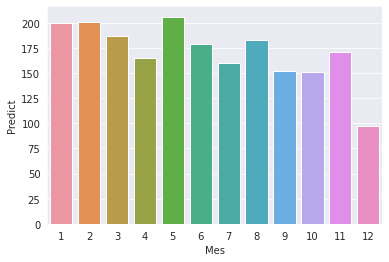

In [37]:
sns.set_style('darkgrid')
sns.barplot(data=df4, x="Mes", y="Predict")



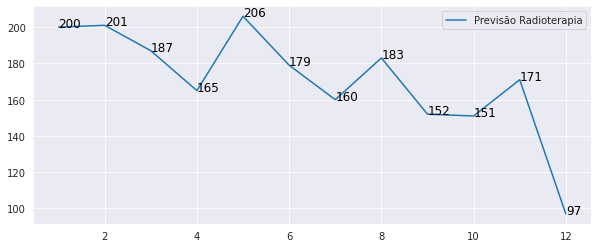

In [42]:
# Gráfico em linha da previsão de radioterapias para 2023
plt.figure(figsize=(10,4))
plt.plot(df4['Mes'], df4['Predict'], label= 'Previsão Radioterapia')
plt.legend()
for x, y in zip(df4['Mes'], df4['Predict']):
    plt.text(x, y, str(y), color="black", fontsize=12)
plt.show()

In [39]:
# Importando o Pickle para salvar o modelo
import pickle

In [ ]:
pickle.dump(model, open('xgb_model.pkl', 'wb'))

In [ ]:
#Recarrega o modelo
#pickled_model = pickle.load(open('xgb_model.pkl', 'rb'))
#pickled_model.predict(X_test)